Naveeda Ali 
<br>
Due date: Jan. 30, 2024, 11:59pm
<br>
PHYS 2030 W24


# <center><font color=#46769B>Homework assignment 3</font></center>

__Rubric (100 points total)__:

- Problem 1 - __20 points__
     
- Problem 2 - __20 points__

- Problem 3 - __20 points__
     
- Problem 4 - __20 points__

- Problem 5 - __20 points__

</font>

## <font color=#46769B>Introduction:</font>

The __muon__ (labeled $\mu$) is an elementary particle that is similar to the electron, except it is about 200 times heavier and is unstable to radioactive decay. The lifetime of the muon is $\tau = 2.2\times 10^{-6}$ seconds, which means that a typical muon survives only a small fraction of a second after being produced, ultimately decaying into an electron and neutrinos. (For the curious reader, more information about muons can be found [here](https://en.wikipedia.org/wiki/Muon).)

One natural source of muons is high-energy cosmic rays. The cosmic rays are fast-moving protons and heavier elements. When they smash into the Earth's atmosphere, the collisions produce showers of particles, including muons.

Despite their short lifetimes, many cosmic ray muons reach the surface of the Earth. In fact, many high-energy muons are able to penetrate a good distance into the Earth, which is the reason why some experiments need to be done at laboratories [deep underground](https://en.wikipedia.org/wiki/SNOLAB). On the other hand, cosmic ray muons can also be very useful, allowing us to see places that are inaccessible.
Measuring how cosmic ray muons are absorbed (similar to taking an x-ray) allowed researchers to discover new hidden spaces in the Great Pyramid of Giza, a technique known as [muon tomography](https://www.livescience.com/56510-photos-inside-great-pyramid-giza.html).

In this assignment, you will perform a Monte Carlo simulation for cosmic ray muons (extending what you did in exercise 3). This is also an example of a __multivariate__ simulation, i.e., sampling multiple variables within the same problem. Here we assume that the variables are *uncorrelated*, meaning that they are sampled independently from one another. 

Our goals for this notebook are:
- Perform a multivariate Monte Carlo simulation, tying together all the knowledge gained so far in the course
- Gain further experience in the inverse CDF method

Required reading:
- *Lesson 3: Sampling from arbitrary distributions*

## <font color=#46769B>Problem 1: Chain rule for sampling</font>

In Exercise 3, we sampled the projected radius $s$ from a distribution

$$P_s(s) = \left\{ \begin{array}{cc} \frac{2 s}{R^2} & {\rm for} \; 0 \le s \le R \\ 0 & {\rm otherwise} \end{array} \right. \, .\qquad {\rm (1)}$$ 

and then obtained samples for the cosmic ray angle $\theta$ according to the formula $\theta = \sin^{-1}(s/R)$.

Your first task is to repeat some steps of Exercise 3, Part (a):

- Generate samples for $s$ from $P_s(s)$, using the inverse CDF method. From this, obtain samples for $\theta$ *in radians*. Plot a histogram of your samples for $\theta$.

Next, we will find the PDF for $\theta$, $P_\theta(\theta)$, by applying the chain rule. The chain rule for PDFs (see Lesson 1 notes) says that

$$P_\theta(\theta) = P_s(s(\theta)) \, \frac{ds}{d\theta} \qquad (2)$$ 

where $s(\theta) = R \sin \theta$.

Your tasks are as follows:

- From Eqs. (1) and (2), determine $P_\theta(\theta)$. (Note: as $P_s(s)$ is only nonzero for $0 < s < R$, the new PDF $P_\theta(\theta)$ is only nonzero for $0 < \theta < \frac{\pi}{2}$.)

- Generate $N = 10^6$ samples for $\theta$ by sampling $P_\theta$ using the inverse CDF method.

- Plot a histogram of your samples for $\theta$ (in radians).

- Plot a line for the PDF $P_\theta(\theta)$.

Note: Put all your plots together in one figure, setting `alpha=0.5` and `density=True` so that (hopefully) you can see that both histograms and your PDF plot all agree. Include a legend and $x$-axis label.



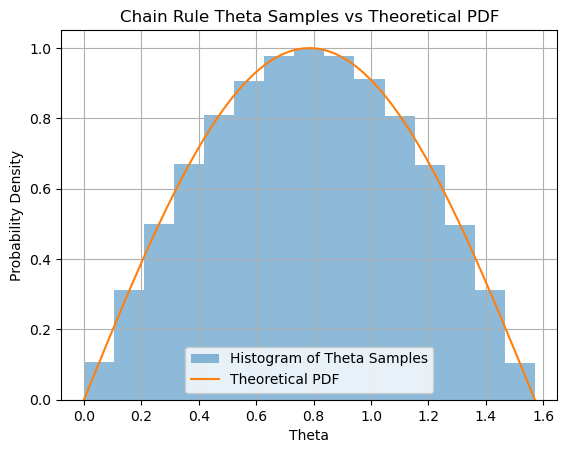

In [129]:
import numpy as np
import matplotlib.pyplot as plt

#Set N (number of samples) to 10^6
num = 10**6
r_samples = np.random.rand(num)
R = 1

#Get samples for s from inverse CDF
s_samples = np.sqrt(r_samples)

#Generate theta samples  
theta_samples = np.arcsin(s_samples/R)

#Generate P(theta) values
P_theta = np.zeros(num)
for i in range(num):
    if 0 <= theta_samples[i] <= (np.pi/2):
        P_theta[i] = (2 * theta_samples[i]) / (R**2)    
    else:
        P_theta[i] = 0
P_theta_s = P_theta*np.cos(theta_samples)

#Plot histogram for s samples
plt.hist(theta_samples,bins=15, alpha = 0.5, density = True, label='Histogram of Theta Samples')
plt.title('Chain Rule Theta Samples vs Theoretical PDF')
plt.xlabel('Theta')
plt.ylabel('Probability Density')

#Theoretical PDF 
x = np.linspace(0,np.pi/2,1000)
PDF = 2*np.sin(x)*np.cos(x)
#Plot theoretical PDF 
plt.plot(x, PDF, label='Theoretical PDF')
plt.legend()
plt.grid()
plt.show()

## <font color=#46769B>Problem 2: Cosmic ray muons, revisited</font>

Here you are to repeat some steps from Exercise 3, in particular, to help you make sense out of the results of Part (c).

Suppose a cosmic ray impacts the atmosphere at height $h$ and with angle $\theta$, creating a muon which travels in the same direction. The muon travels a distance $d = c t$ before it decays, where $t$ is the time it takes to decay. The muon is assumed to travel at the speed of light, $c = 3 \times 10^5 \; {\rm km/s}$. 

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/Cosmic-ray-fig-3.png" width="800">
</div>

With some geometry, the height above the Earth's surface where the muon decays is

$$z = h - \frac{ct}{\cos\theta} \qquad (3)$$

Here we will *not* assume that $h$ is a fixed number, but we will allow for some uncertainty by sampling $h$ from a normal distribution.

Your tasks are as follows:

- Generate $N=10^6$ samples for each of the following quantities:

    - $\theta$, either by sampling from $P_\theta(\theta)$ as in Problem 1, or using $P_s(s)$ as in Exercise 3
    
    - $t$, by sampling from an exponential distribution as in Exercise 3
    
    - $h$ by sampling from a normal distribution, $\mathcal{N}(15 \; {\rm km/s}, 2 \; {\rm km/s})$

- Using your samples and Eq. (3), obtain samples for $z$ in units of ${\rm km}$.

- Make a histogram for $z$ that *only covers the region* $z > 0$ above the Earth's surface. The best way to do this is to by setting the `bins` in histogram to cover that region. Here is how:
```py
plt.hist(z,bins=np.linspace(0,25,30))
```
This sets the bin edges to be points in the `linspace`, e.g., 30 bins that go from $[0,25]$. Also, use a log-scale for the $y$-axis.

- Calculate and print the fraction of muons that reach the Earth's surface.

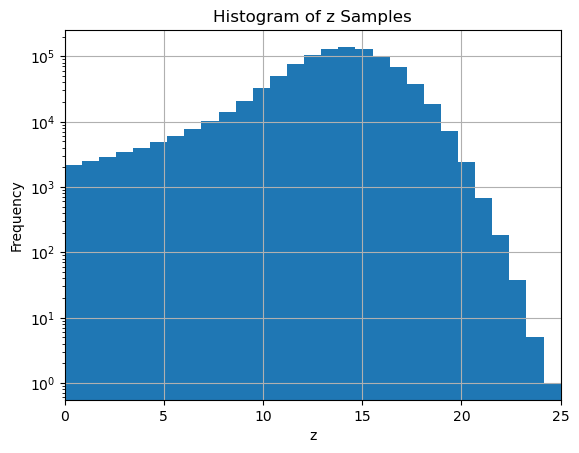

The fraction of muons that reach the Earth's surface is 97.3461 %


In [130]:
#Constants
num = 10**6 
tau = 2.2*10**-6
c = 3*10**5
R = 1

#From Problem 1
#Generate r samples from uniform distribution
r_samples = np.random.rand(num)
#Get samples for s from inverse CDF
s_samples = np.sqrt(r_samples)
#Generate theta samples from s samples
theta_samples = np.arcsin(s_samples/R)

#Generate P(theta) values 
P_theta = np.zeros(num)
for i in range(num):
    if 0 <= theta_samples[i] <= (np.pi/2):
        P_theta[i] = (2 * theta_samples[i]) / (R**2)    
    else:
        P_theta[i] = 0
P_theta_s = P_theta*np.cos(theta_samples)

#Generate t and h samples like exercise 3
t_samples = -tau*(np.log(1-r_samples))
h_samples = np.random.normal(15,2,num)

#Generate z samples from eq. 3
z1_samples = h_samples - ((c*t_samples)/np.cos(theta_samples))

#Plot histogram of z samples
plt.hist(z1_samples,bins=np.linspace(0,25,30))
plt.xlim([0,25])
plt.yscale('log')
plt.title('Histogram of z Samples')
plt.xlabel('z')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#Calculate fraction of muons that reach the Earth's surface
fraction_muons = (np.sum(z1_samples >= 0) / num)*100
print('The fraction of muons that reach the Earth\'s surface is',fraction_muons,'%')


## <font color=#46769B>Problem 3: Cosmic ray muons, with time dilation</font>

Cosmic ray muons are travelling close to the speed of light $c$, so we have to account for *time dilation*, as per Einstein's theory of Special Relativity. The decay time $t$ is the muon's decay time *at rest*, i.e., in the rest frame of the muon. To an observer at rest on the Earth, the muon's decay time will be $\gamma t$, where 

$$\gamma = \frac{E}{E_m}$$ 

is the [Lorentz factor](https://en.wikipedia.org/wiki/Lorentz_factor), where $E$ is the total muon energy (kinetic + rest energy) and $E_m = m c^2$ is the muon rest energy. We also have the muon velocity $v = c \sqrt{1 - E_m^2/E^2}$, which is close to $c$ for $E \gg E_m$.

Putting this all together, the distance traveled by the muon is

$$ d = v \gamma t = c t \frac{\sqrt{E^2 - E_m^2}}{E_m} \, . \qquad {\rm (4)}$$

Now, to obtain samples for $d$, we need to know the muon energy $E$. This is not a fixed number and we will assume that cosmic muons have a power-law distribution according to the following PDF

$$P(E) = 
\left\{ \begin{array}{cc} E_m E^{-2} & {\rm for} \; E \ge E_m \\
0 & {\rm otherwise} \end{array} \right. \, .$$

Use the following numerical constants:
- Muon rest mass energy: $E_m = mc^2 = 0.106 \; {\rm GeV}$. (It is customary to measure the rest mass energy in units of GeV (giga-electron volts), instead of SI units (Joules).)
- Speed of light: $c = 3 \times 10^5 \;  {\rm km/s}$.

Here you are to repeat Problem 1 with taking in account time dilation. Your tasks are as follows. Taking $N=10^6$:

- Generate $N$ samples $E$ from $P_E(E)$ using the inverse CDF method.

- Generate $N$ samples for $t$, $\theta$, $h$ as in Problem 1.

- Calculate $N$ samples for $d$ according to Eq. (4), in units of ${\rm km}$.

- Calculate $N$ samples for $z$ according to Eq. (3), in units of ${\rm km}$.

- Make a histogram for $z$ for $z > 0$ above the Earth's surface. On the same plot, include your histogram from Problem 2. Set `alpha=0.5` and use a log-scale for the $y$-axis, but *do not* set `density=True` here. Include a legend and $x$-axis label.

- Calculate and print the fraction of muons that reach the Earth's surface.

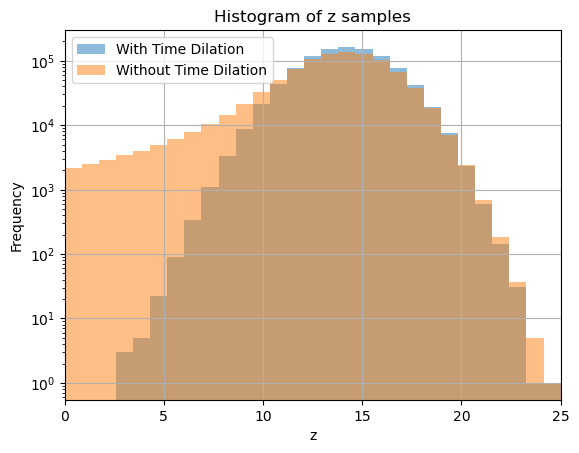

The fraction of muons that reach the Earth's surface is 100.0 %


In [131]:
#Constans 
num = 10**6 
Em= 0.106

#Generate E samples from inverse CDF
u_samples = np.random.rand(num)
E_samples = Em/(1-u_samples)

#Generate t and h samples like Problem 2
t_samples = -tau*(np.log(1-u_samples))
h_samples = np.random.normal(15,2,num)
#Generate theta samples like Problem 1
s_samples = np.sqrt(1-u_samples)
theta_samples = np.arcsin(s_samples/R)
#Generate d samples from eq. 4
d_samples = c*t_samples*(np.sqrt(E_samples**2-Em**2)/Em)
#Generate z samples from eq. 3
z2_samples = h_samples - ((c*t_samples)/np.cos(theta_samples))

#Plot histogram of new z samples
plt.hist(z2_samples,bins=np.linspace(0,25,30), alpha=0.5,label='With Time Dilation')
#Plot histogram of old z samples
plt.hist(z1_samples,bins=np.linspace(0,25,30), alpha=0.5,label='Without Time Dilation')
plt.legend()
plt.xlim([0,25])
plt.yscale('log')
plt.title('Histogram of z samples')
plt.xlabel('z')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#Calculate fraction of Muons that reach Earth's surface 
fraction_muons = (np.sum(z2_samples >= 0) / num)*100
print('The fraction of muons that reach the Earth\'s surface is',fraction_muons,'%')

## <font color=#46769B>Problem (4): Cosmic ray observer</font>

Consider an observer on the surface of the Earth, who will detect the energy $E$ and angle $\theta$ of the muons. The goal here is to determine the distribution of $E$ and $\theta$ measured by the observer. Naturally, they are limited only to those muons that reach the surface.

Using your samples in Problems (3), your tasks are as follows:

- Plot the histogram for $E$ *for only muons that reach the surface*. On the sample plot, show the histogram for $E$ for *all samples*, as well as the original PDF for $E$. Be sure that you include labels, your histograms are normalized (`density=True`) and have `alpha=0.5`, and use log-log scales for your axes.

- Plot the histogram for $\theta$ *for only muons that reach the surface*. On the sample plot, show the histogram for $\theta$ for *all samples*, as well as the original PDF for $\theta$. Be sure that you include labels, your histograms are normalized (`density=True`) and have `alpha=0.5`, and use linear-linear scales for your axes.

You should find that the distributions of muons reaching the surface is skewed toward higher energies $E$ and smaller angles $\theta$, which makes sense since faster muons moving straight down are more likely to reach the surface.

C:\Users\needi\AppData\Local\Temp\ipykernel_32072\2967880404.py:12: RuntimeWarning: divide by zero encountered in power
  PDF = Em * x**-2


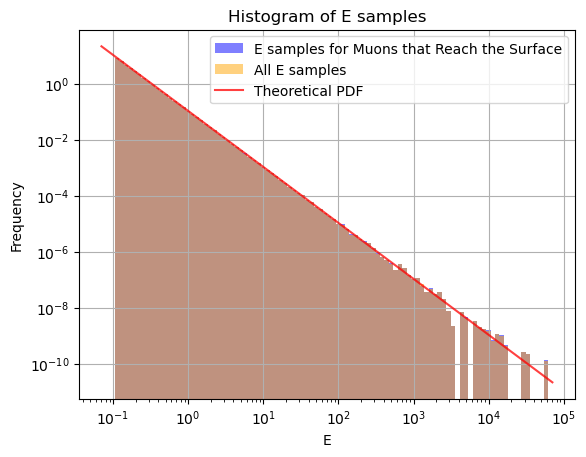

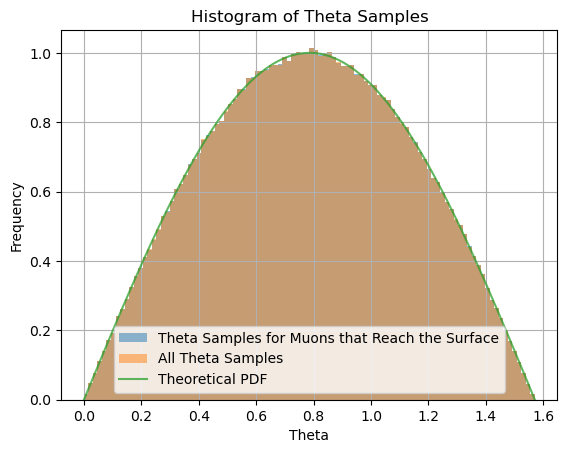

In [132]:
#Filter E samples for only muons that reach the surface 
E_samples_surface = E_samples[z_samples>0]
E_samples_surface = E_samples_surface[E_samples_surface > 0]

#Plot histogram of E samples for only muons that reach the surface 
plt.hist(E_samples_surface, bins=np.logspace(np.log10(min(E_samples_surface)), np.log10(max(E_samples_surface)), 100), density=True, alpha=0.5,label='E samples for Muons that Reach the Surface',color='blue')
#Plot histogram of all E samples
plt.hist(E_samples,bins=np.logspace(np.log10(min(E_samples)), np.log10(max(E_samples)), 100),density=True,alpha=0.5, label='All E samples',color='orange')

#Theoretical PDF of E 
x = np.linspace(0,max(E_samples),num)
PDF = Em * x**-2
#Plot theoretical PDF 
plt.plot(x,PDF,color='red',alpha =0.75,label='Theoretical PDF')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Histogram of E samples')
plt.xlabel('E')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#Filter theta samples for only muons that reach the surface 
theta_samples_surface = (theta_samples[z_samples > 0])

bin_edges = np.linspace(0, (np.pi/2), 101)
plot_range = (0, np.pi/2)
#Plot histogram of theta samples for only muons that reach the surface
plt.hist(theta_samples_surface,density=True,bins=bin_edges, alpha=0.5, label='Theta Samples for Muons that Reach the Surface')
#Plot histogram of all theta samples
plt.hist((theta_samples),density=True,bins=bin_edges, alpha=0.5, label='All Theta Samples')

#Theoretical PDF of theta
x = np.linspace(0,np.pi/2,1000)
PDF = 2*np.sin(x)*np.cos(x)
#Plot theoretical PDF 
plt.plot(x, PDF, alpha=0.75, label='Theoretical PDF')
plt.title('Histogram of Theta Samples')
plt.xlabel('Theta')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

## <font color=#46769B>Problem 5: Monte Carlo integration</font>

Now for something different.

Monte Carlo sampling is a useful tool for performing numerical integration. In this problem, we will show how this works in a simple context.

Let's consider the (definite) integral

$$I = \int_a^b dx \, f(x)$$

Note that the volume of integration is $V = \int_a^b dx = (b - a)$. Let's divide both sides by $V$:

$$\frac{I}{V} = \int_a^b dx \, \frac{1}{b-a} \, f(x) $$

Now, the factor of $1/(b-a)$ is nothing more than the PDF for a uniform distribution

$$P(x) = \left\{ \begin{array}{cc} \frac{1}{b-a} & a < x < b \\ 0 & {\rm otherwise} \end{array} \right.$$

So, we can express our integral as the mean of $f(x)$

$$\frac{I}{V} = \int_{-\infty}^{\infty} dx \, P(x) \, f(x) = \overline{f(x)}$$

which we can approximate as $\langle f(x) \rangle$ using Monte Carlo sampling. In summary, the integral we want to compute is approximated as

$$I = V \langle f(x) \rangle$$

which approaches the true value of $I$ in the limit $N \to \infty$.

Let's consider the integral:

$$I = \int_{-\pi/2}^{\pi/2} dx \, \frac{\sin x}{x} $$

Your task is as follows:

- Write a function `MC_integrate(num)` that uses Monte Carlo sampling to calculate $I$ and the error $E_I$, where `num` is the number of samples $N$. Your function should return both $I$ and $E_I$.

- Using your function, evaluate $I$ by choosing a large enough $N$ such that the error $E_I < 0.001$. Print your result for $I$ and $E_I$.

Hints:

- The error $E_I$ is calculated as $E_I = V E_{f(x)}$, where $E_{f(x)}$ is the standard error of the mean of $f(x)$ calculated from your samples, i.e., $E_{f(x)} = \Delta f(x)/\sqrt{N}$.

- This integral can be computed using a built-in function `scipy.special.sici` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sici.html).) Feel free to use this as a cross-check that you have done the calculation correctly.



In [134]:
from scipy.special import sici

#Define function for f(x)
def f(x):
    return np.sin(x)/x

#Define function for MC_integrate(num)
def MC_integrate(num):
    #Boundary conditions
    a = -np.pi/2
    b = np.pi/2
    
    #Sample x from uniform distribution [a,b]
    x_samples = np.random.uniform(a,b,num)
    #Generate f samples from f(x) 
    f_samples = f(x_samples)
    #Approximate value for I using relationship above
    I_approx = (b-a) * np.mean(f_samples)
    #Error on I 
    E_I = (b-a)*(np.std(f_samples,ddof=1)/np.sqrt(num))
    
    return I_approx, E_I

#Set number of samples 
num = 10**7
I, E_I = MC_integrate(num)

print('The value of I is', I)
print('The value of the error on I is', E_I)


#Using scipy's sici function to check
I_true_upper, _ = sici(np.pi/2)
I_true_lower, _ = sici(-np.pi/2)
I_true = I_true_upper - I_true_lower

print('The true I value is', I_true)


The value of I is 2.7416044004089812
The value of the error on I is 0.00010958949902792472
The true I value is 2.7415243363089767
